# Problema de Monty Hall #

## Objetivos
### Objetivo General
### Objetivo Específico

## Modelo
Se tiene el problema de Monty Hall, el cual menciona:
 
>Supón que estás en un concurso, y se te ofrece escoger entre tres puertas: detrás de una de ellas hay un coche, y detrás de las otras, cabras. Escoges una puerta, digamos la n° 1, y el presentador, que sabe lo que hay detrás de las puertas, abre otra, digamos la n° 3, que contiene una cabra. Entonces te pregunta: ¿No prefieres escoger la n° 2? ¿Es mejor para ti cambiar tu elección?

![](auto.png)

Con las diferentes decisiones, podemos armar un árbol de probabilidades, donde el primer nivel es la probabilidad de cada puerta de tener el premio, el sigueinte nivel es la probabilidad de nosotros eligiendo la puerta, y el último nivel la probabilidad de la puerta que el presentador va a abrir.

![](MontyHall.png)

El problema surge en la segunda decisión, la cual implica si debemos cambiar de puerta o conservar la que hemos elegido desde un principio, después de que el presentador haya demostrado que detrás de otra hay una cabra. Mucho se piensa que se tendrá la misma probabilidad cambiar de puerta que conservar la que hemos elegido, pero la realidad es que tendremos mayor probabilidad de ganar si cambiamos de puerta. 
Esto debiudo a que, en primer lugar, cuando elegimos la primera puerta, tenemos $1/3$ de probabilidad de ganar el auto, pero $2/3$ de equivocarnos, es decir, de que las demás puertas contengan el auto. 

![](puertas.png)

Cuando se abre la puerta que contiene una cabra, solamente nos quedan dos opciones: la puerta que elegimos principal y otra. Ahora, el $2/3$ de probabilidad recae totalmente en la puerta que queda sin abrir, mientras que la nuestra mantiene el $1/3$ de poseer el auto. Es por esto que es más probable ganar el auto cambiando de puerta.

![](cabra.png)

## Solución

- Primeramente, importamos las librerías que utilizaremos

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

- Continuamos con hacer la selección de la puerta que eligiremos y de la puerta tras la que estará el auto. En este caso, serán elegidas aleatoriamente. 
- Para demostrar que las probabilidades de ganar en esta primera elección son de $1/3$, graficaremos en un histograma las selecciones aleatorias, que resultarán en números muy similares

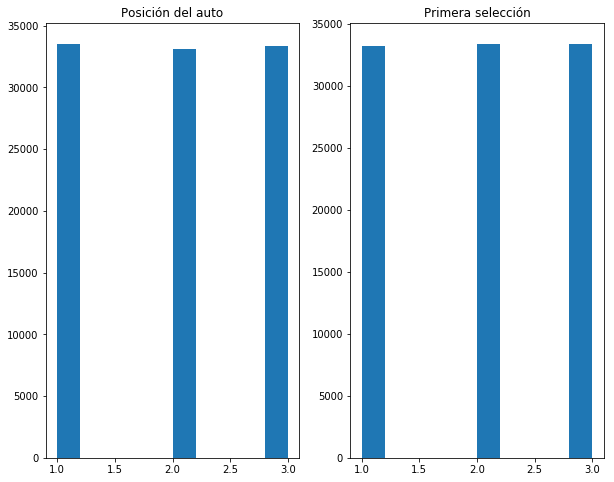

In [2]:
# Cantidad de iteraciones
N = 100000

# La selección del auto se escoge al azar dentro de las opciones
auto = np.random.randint(3, size = N) + 1

# La puerta que primero escogeremos, será seleccionada al azar
primer_selec = np.random.randint(3, size = N) + 1

# Graficar elecciones
f, ax = plt.subplots(ncols=2, nrows=1, figsize = (10,8))
ax[0].hist(auto)
ax[0].set_title("Posición del auto")
ax[1].hist(primer_selec)
ax[1].set_title("Primera selección")
plt.show()

- A continuación, proseguiremos a desarrollar el algoritmo que nos vaya seleccionando la puerta que abrirá el presentador, y después de esto, decidir si cambiaremos o mantendremos la puerta que hemos elegido al principio.
- En este caso iremos contando ambas posibilidades para después compararlas.

In [3]:
##Contadores 
Gana_mantener = 0
Gana_cambio = 0

for i in range(len(auto)):
    puertas = [1,2,3]
    
    ##Remover la selección y la posición del auto
    puertas.remove(primer_selec[i])
    if auto[i] in puertas:
        puertas.remove(auto[i])
    
    ## Si la selección y el auto son la misma puerta, seleccionar al azar una puerta que abrirá el presentador
    puerta_abierta = puertas[np.random.randint(len(puertas))]
    
    ## Las nuevas opciones son todas las anteriores menos la que ya está abierta
    nuevasop = [1,2,3]
    nuevasop.remove(puerta_abierta)
    

    
    ## Cambiar de puerta
    nuevasop.remove(primer_selec[i])
    cambio_puerta = nuevasop[0]
    
        
    if  auto[i] == primer_selec[i]:
        Gana_mantener = Gana_mantener + 1
        
    if  auto[i] == cambio_puerta:
        Gana_cambio = Gana_cambio + 1
        

print("Veces Ganando manteniendo la puerta: %d"%(Gana_mantener))
print("Veces Ganando cambiando de puerta: %d"%(Gana_cambio))

Veces Ganando manteniendo la puerta: 33431
Veces Ganando cambiando de puerta: 66569


- Finalmente, podemos observar que las veces que se gana manteniendo la puera es de aproximadamente $33000$ mientras que las veces que se gana cambiando la puerta son de aproximadamente $66000$, siendo el $33%$ y el $66%$, es decir, $1/3$ y $2/3$ respectivamente.

## Visualización

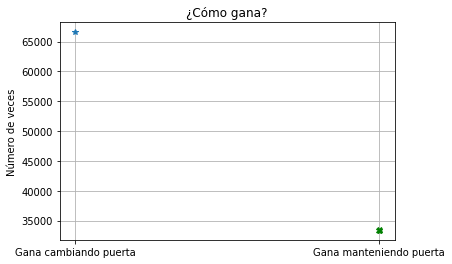

In [4]:
x1 = "Gana cambiando puerta"
x2 = "Gana manteniendo puerta"
y1 = Gana_cambio
y2 = Gana_mantener


plt.plot(x1,y1,'*',linewidth=10)
plt.plot(x2,y2,'X',linewidth=10,color='g')
plt.grid()
plt.ylabel('Número de veces')
plt.title('¿Cómo gana?')
plt.show()

## Conclusiones

## Referencias
Batanero Bernabeu, C., Fernandes, J. and Contreras García, J. (2009). Un análisis semiótico del problema de Monty Hall e implicaciones didácticas. Suma +, [online] (62), pp.11-18. Available at: http://www.ugr.es/~batanero/pages/ARTICULOS/suma.pdf [Accessed 13 Nov. 2019].